In [1]:
from ngsolve import *
from ngsolve.meshes import Make1DMesh
from ngsolve.webgui import Draw
import numpy as np
import math
import matplotlib.pyplot as plt

In [2]:
mesh = Make1DMesh(500, mapping=None, periodic=False)
# uniform distributed load
# q = np.arange(start=0, stop=100, step=10)
q = 2000
# Draw(mesh)

In [3]:
w = H1(mesh, order=1, dirichlet="left|right")
sigma = H1(mesh, order=1, dirichlet=" ")
mu = NumberSpace(mesh)
fesm = w*sigma*mu
print ("ndof =", fesm.ndof)

ndof = 1003


In [4]:
w, sigma, mu = fesm.TrialFunction()
v , tau, lamda = fesm.TestFunction()

Newton iteration  0
err =  74.5355992512265
Newton iteration  1
err =  35.06816238725804
Newton iteration  2
err =  27.66384245815706
Newton iteration  3
err =  26.349017274630537
Newton iteration  4
err =  17.693614613724492
Newton iteration  5
err =  23.945167552593016
Newton iteration  6
err =  26.721700183033775
Newton iteration  7
err =  31.908612341013082
Newton iteration  8
err =  38.60177619837778
Newton iteration  9
err =  47.46608707265755
Newton iteration  10
err =  58.970226151299116
Newton iteration  11
err =  73.8300661648728
Newton iteration  12
err =  84.22341602713692
Newton iteration  13
err =  28.174284149033188
Newton iteration  14
err =  129.3346846407778
Newton iteration  15
err =  116.71496428537733
Newton iteration  16
err =  60.29806789645398
Newton iteration  17
err =  147.5275116328229
Newton iteration  18
err =  195.43745575870258
Newton iteration  19
err =  235.38472887003763
Newton iteration  20
err =  286.7250989508671
Newton iteration  21
err =  366.7921

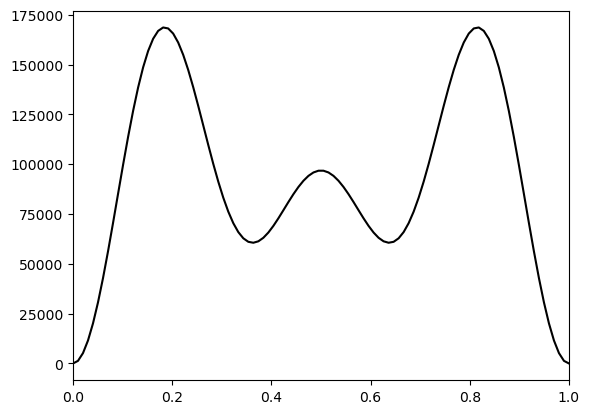

In [5]:

a = BilinearForm(fesm)
a += (grad(sigma)*grad(v)  + 1/2*grad(w)*grad(v)*mu + sigma*tau \
+ grad(w)*grad(tau) + mu*lamda - grad(w)**2*lamda + q*v)*dx
    
gfsol = GridFunction(fesm)
    
solvers.Newton(a,gfsol,inverse="sparsecholesky")
gfw, gfsigma, gfmu = gfsol.components
x=np.linspace(0,1,100)
#     gfw(mesh(x))

plt.plot(x,gfw(mesh(x)),color='black',label='Transverse Load = 0.4',linestyle="-")
#     plt.ylim([-0.0025, 0.0025])
plt.xlim([0, 1.0])
index = int((len(gfw.vec)+1)/2)
#     print(gfw.vec[index])
#     y_axis.append(gfw.vec[index])
